The purpose of this notebook is to analyze data from california housing dataset with plots and on interactives Leaflet.js maps using Folium.

It is possible to interact with the maps of this jupyter notebook using nbviewer in the following link:

http://nbviewer.jupyter.org/github/alvertogit/datascience/blob/master/Geospatial%20analysis%20california%20housing.ipynb


**Data Set Characteristics:**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
- MedInc        median income in block
- HouseAge      median house age in block
- AveRooms      average number of rooms
- AveBedrms     average number of bedrooms
- Population    block population
- AveOccup      average house occupancy
- Latitude      house block latitude
- Longitude     house block longitude

Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/
The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.

Census Bureau publishes sample data (a block group typically has a population\nof 600 to 3,000 people).

References
- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,Statistics and Probability Letters, 33 (1997) 291-297

In [1]:
from sklearn.datasets import fetch_california_housing # california housing dataset

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import folium # interactive map
import pandas as pd # data structures
import numpy as np # linear algebra, arrays

In [2]:
dataset = fetch_california_housing()

In [3]:
names = dataset.feature_names
print(names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Split data into training (75%) and testing (25%)

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset.data,
                                                                            dataset.target,
                                                                            test_size=0.25,
                                                                            random_state=4)

**Data analysis**

In [5]:
print(train_features.shape)
print(train_labels.shape)

(15480, 8)
(15480,)


In [6]:
print("Train labels range: {0} - {1}".format(min(train_labels),max(train_labels)))

Train labels range: 0.14999 - 5.00001


In [7]:
print(test_features.shape)
print(test_labels.shape)

(5160, 8)
(5160,)


House distribution based on location

<Figure size 720x720 with 0 Axes>

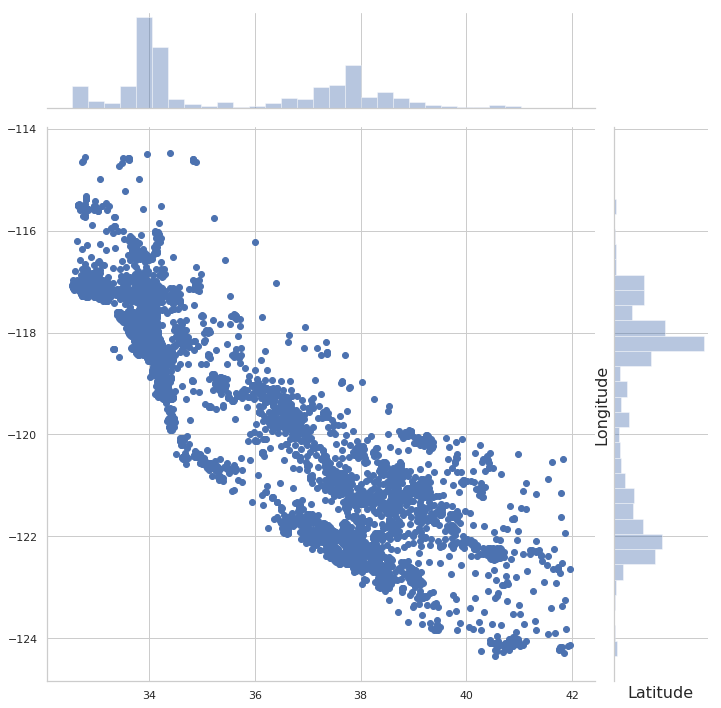

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
sns.jointplot(x=train_features[:,6],
              y=train_features[:,7],
              height=10)
plt.ylabel('Longitude', fontsize=16)
plt.xlabel('Latitude', fontsize=16)
plt.show()

Interactive heatmap with folium needs some data preparation

In [9]:
heat_data = [[train_features[i][6], train_features[i][7]] for i in range(len(train_features))]

California housing interactive heatmap based on location

In [10]:
from folium.plugins import HeatMap

california_heat_map = folium.Map([37, -120], 
                        tiles='stamentoner', 
                        zoom_start=6)

HeatMap(heat_data, radius= 14).add_to(california_heat_map)

california_heat_map

Housing analysis based on location, price and population (circles radius)

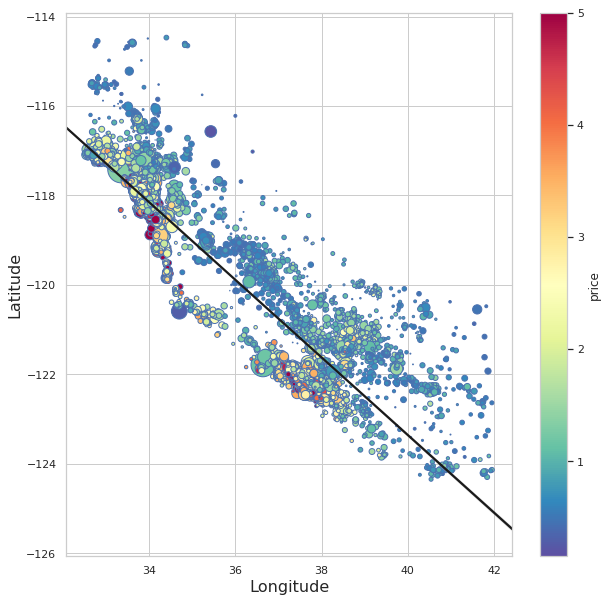

In [11]:
plt.figure(figsize=(10,10))
points = plt.scatter(x=train_features[:,6], 
                     y=train_features[:,7],
                     s=train_features[:,4]/50,
                     c=train_labels, cmap='Spectral_r', edgecolors='b') # set style options

plt.colorbar(points, label='price') # add a color bar
sns.regplot(x=train_features[:,6],
            y=train_features[:,7], 
            scatter=False, color='.1')
plt.ylabel('Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=16)
plt.show()

Interactive housing map for the first 1000 train samples using circles

Color circles go from blue (lower prices) to red (higher prices)

In [12]:
train_labels_color = pd.cut(train_labels, bins=5, 
                            labels=['blue','green','yellow','orange','red'])

Circles properties provide additional information for price (color) and population (radius)

In [13]:
california_prices_map = folium.Map([36, -120], 
                        tiles='stamenterrain', 
                        zoom_start=7)

# create feature group
fg = folium.FeatureGroup(name='housing locations')

# drawing first 1000 samples
for i in range(1000):
    my_Circle=folium.CircleMarker(location=[train_features[i][6],train_features[i][7]],
                                  radius=train_features[i][4]/400,
                                  fill=True,
                                  color=train_labels_color[i],
                                  fill_opacity=0.7)
    fg.add_child(my_Circle)

california_prices_map.add_child(fg)

Population and coast proximity affect prices